In [2]:
import gymnasium as gym  # Gymnasium kütüphanesini içe aktarır (ortam simülasyonu için)
import numpy as np       # Numpy kütüphanesini içe aktarır (sayısal işlemler için)

from stable_baselines3 import DDPG  # DDPG algoritmasını içe aktarır
from stable_baselines3.common.noise import NormalActionNoise  # Eylem gürültüsü sınıfını içe aktarır


In [ ]:
# "Pendulum-v1" ortamını oluşturur, görselleştirme için 'rgb_array' modunu kullanır
environment = gym.make("", render_mode="rgb_array")

# Ortamın eylem uzayındaki eylem sayısını alır
num_actions = environment.action_space.shape[-1]

# DDPG algoritması için normal dağılımlı eylem gürültüsü, ajan öğrenirken eylemlerine rastgelelik katar.
# Bu rastgelelik, ajanı farklı eylemleri keşfetmeye teşvik ederek daha iyi bir politika öğrenmesini sağlar.
# Özellikle sürekli eylem uzaylarında, keşif (exploration) için gereklidir.
action_noise = NormalActionNoise(mean=np.zeros(num_actions), sigma=0.1 * np.ones(num_actions))

# DDPG modelini oluşturur, çok katmanlı algılayıcı (MLP) politika ve eylem gürültüsü ile başlatır
agent = DDPG("MlpPolicy", environment, action_noise=action_noise, verbose=1)

# Modeli 10.000 adım boyunca eğitir, her 10 adımda bir günlük kaydı yapar
agent.learn(total_timesteps=10000, log_interval=10)

# Eğitilmiş modeli "ddpg_pendulum" adıyla kaydeder
agent.save("ddpg_pendulum")

# Ortamı vektörleştirilmiş ortam olarak alır (Stable Baselines3 ile uyumlu)
vector_env = agent.get_env()

# Model nesnesini siler (bellekten kaldırır)
del agent

# Kaydedilmiş modeli diskten tekrar yükler
agent = DDPG.load("ddpg_pendulum")

# Ortamı sıfırlar ve başlangıç gözlemini alır
observation = vector_env.reset()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.37e+03 |
| time/              |           |
|    episodes        | 10        |
|    fps             | 52        |
|    time_elapsed    | 38        |
|    total_timesteps | 2000      |
| train/             |           |
|    actor_loss      | 62.8      |
|    critic_loss     | 0.158     |
|    learning_rate   | 0.001     |
|    n_updates       | 1899      |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.01e+03 |
| time/              |           |
|    episodes        | 20        |
|    fps             | 51        |
|    time_elapsed    | 77        |
|    total_timesteps | 4000      |
| train/             |           |
|    actor_loss      | 80      

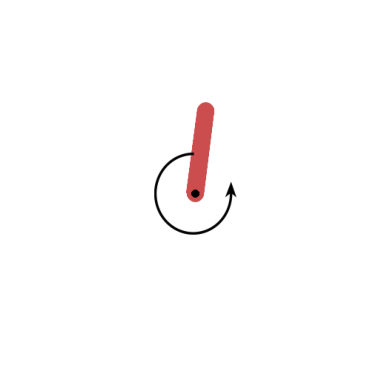

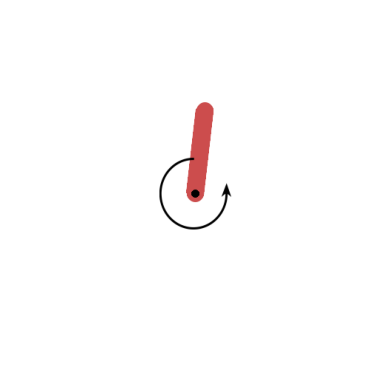

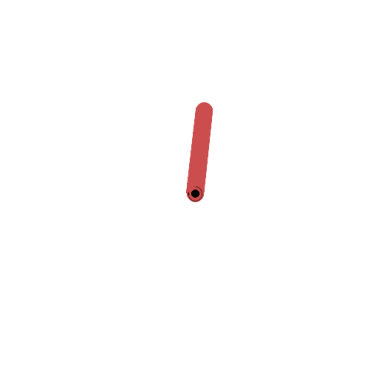

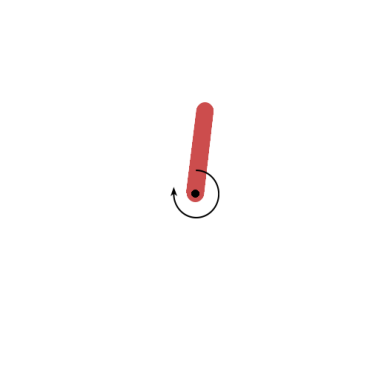

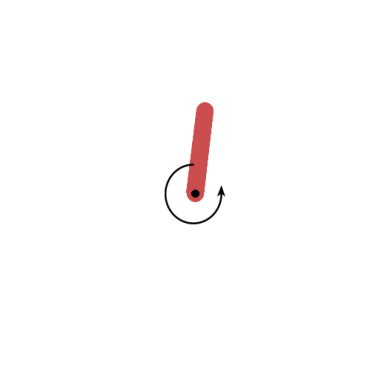

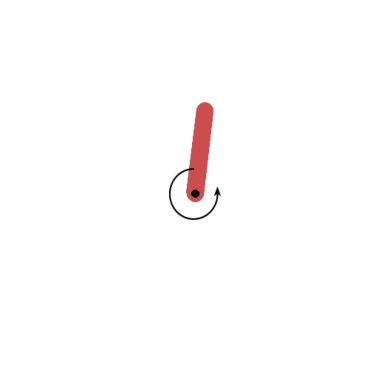

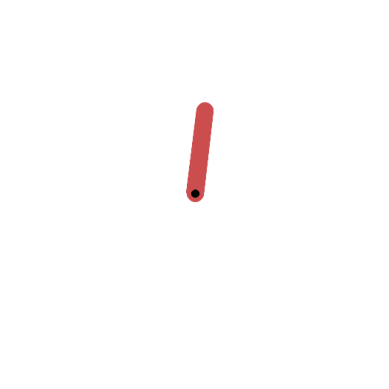

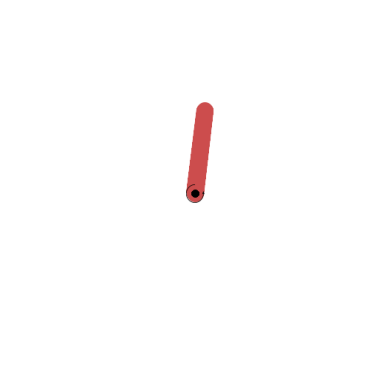

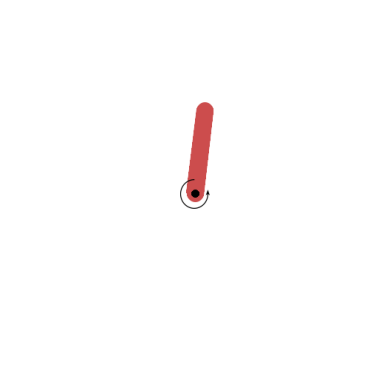

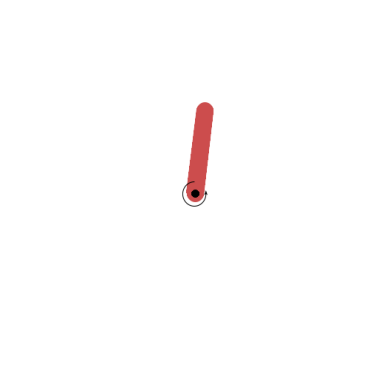

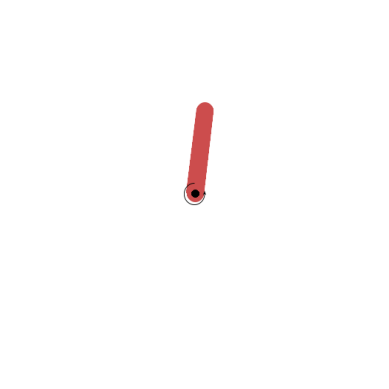

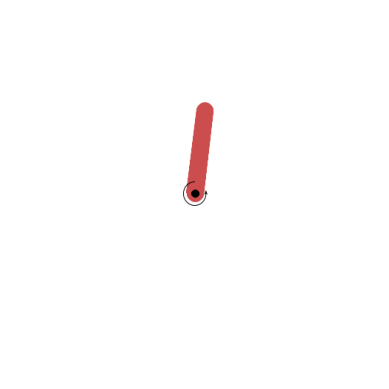

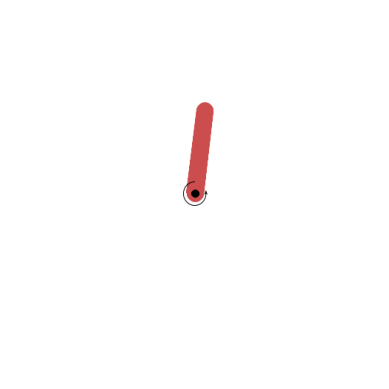

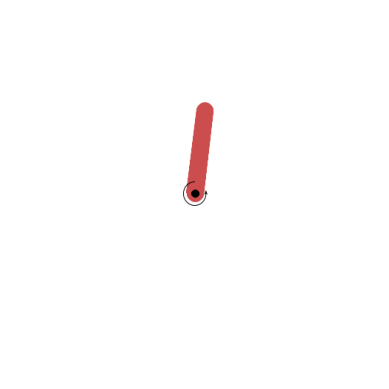

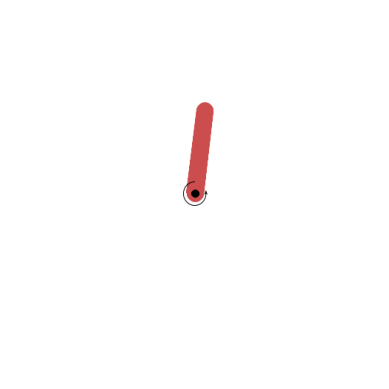

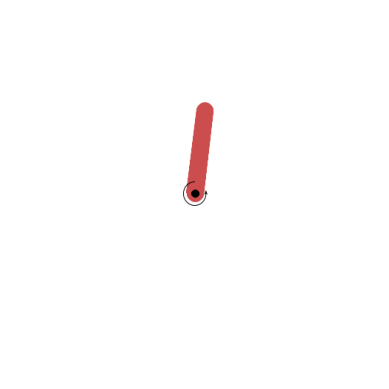

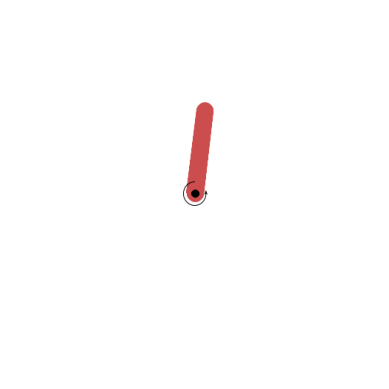

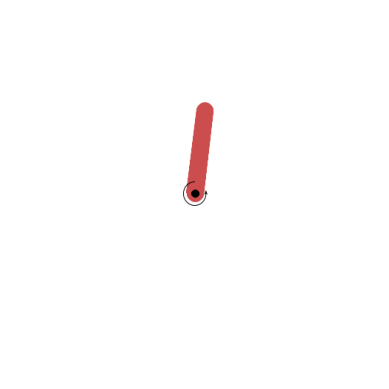

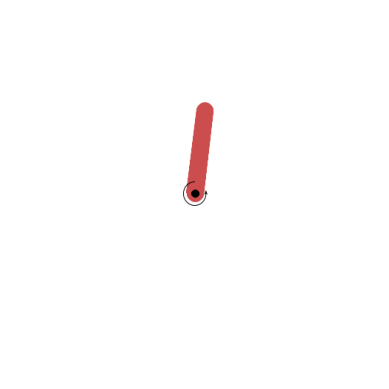

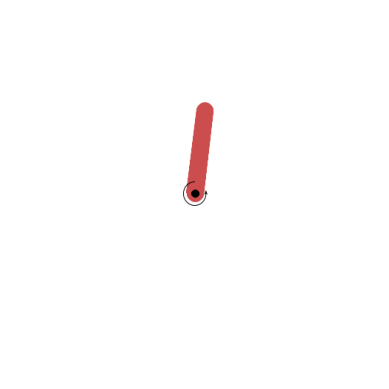

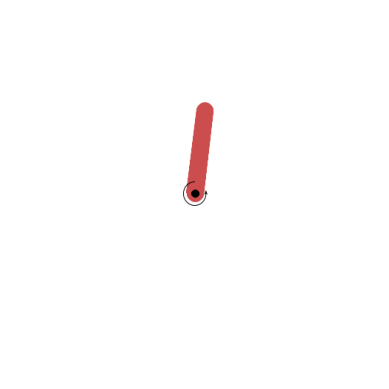

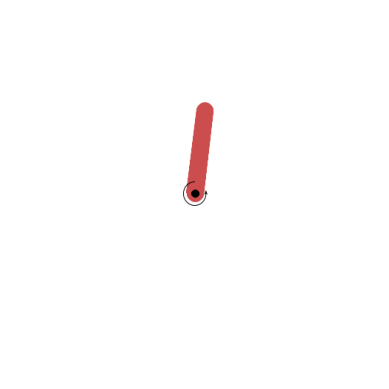

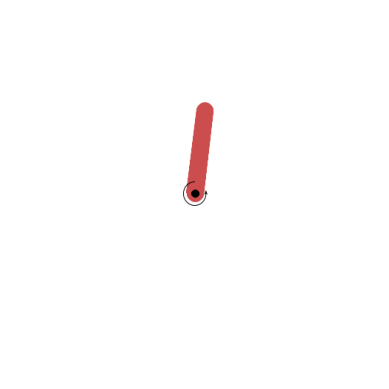

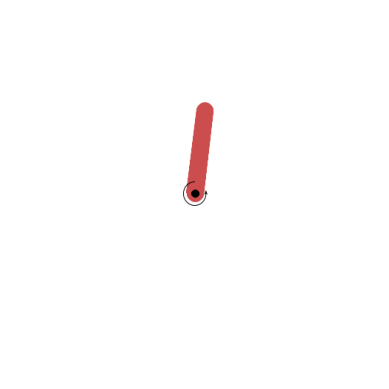

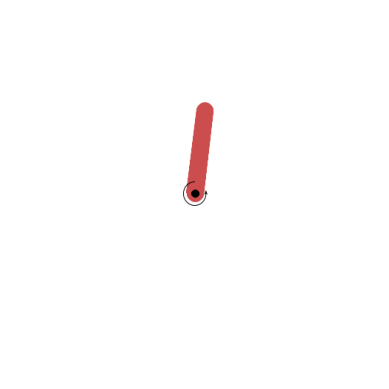

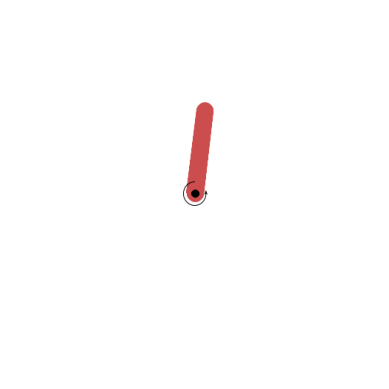

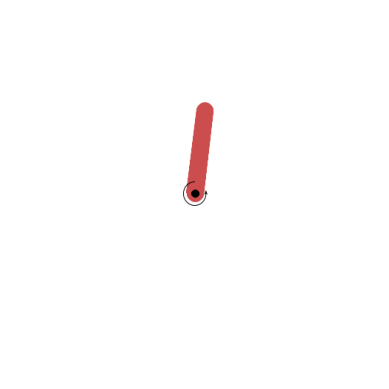

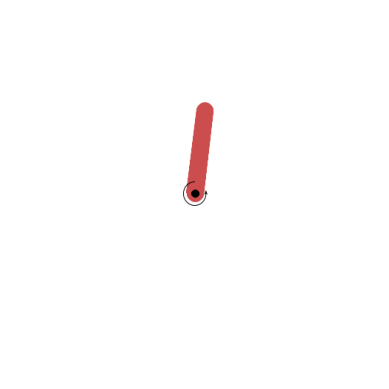

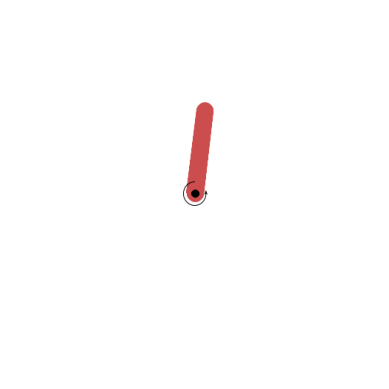

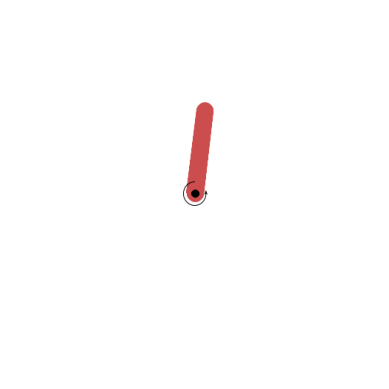

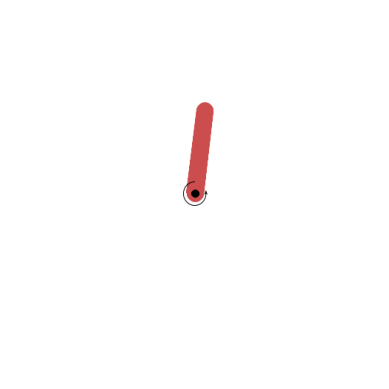

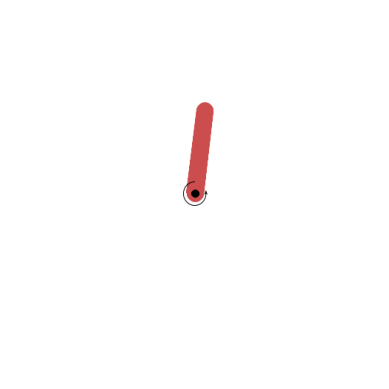

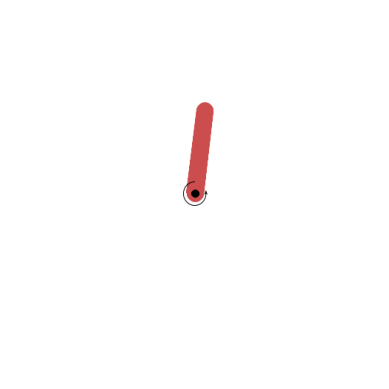

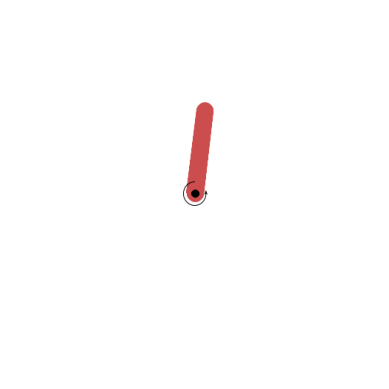

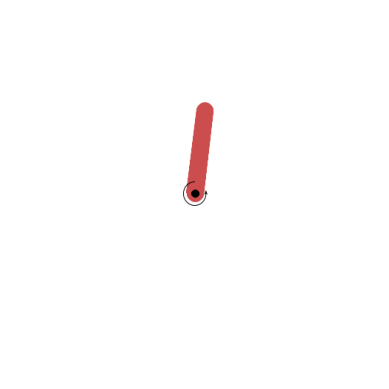

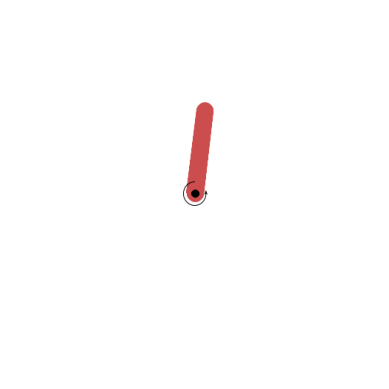

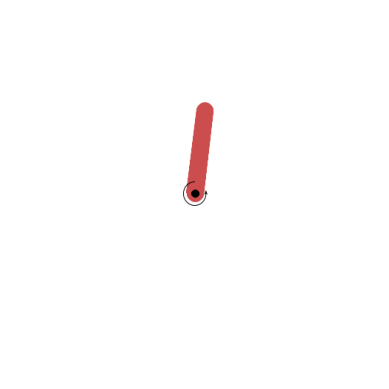

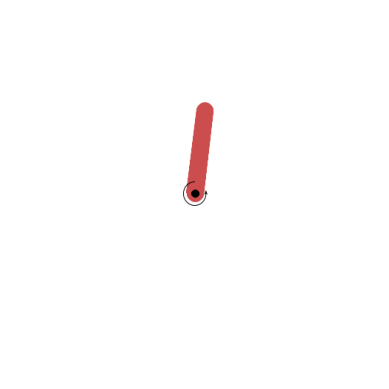

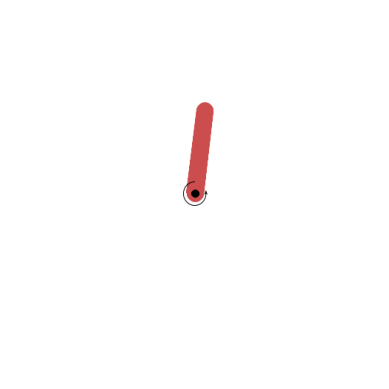

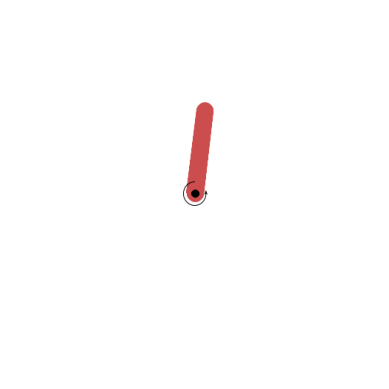

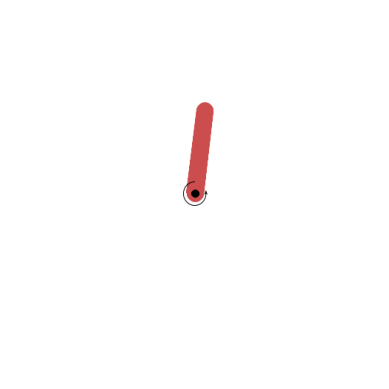

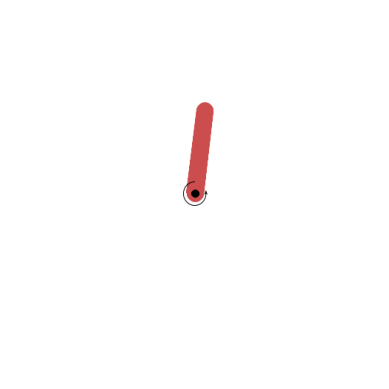

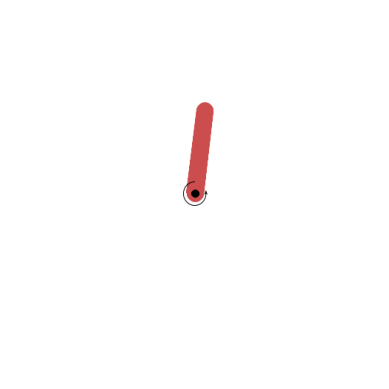

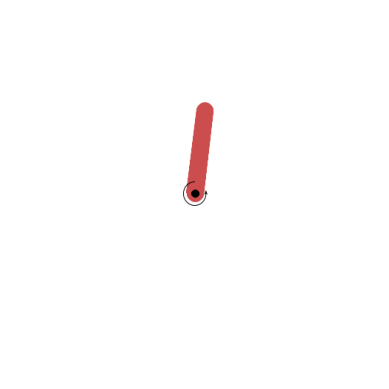

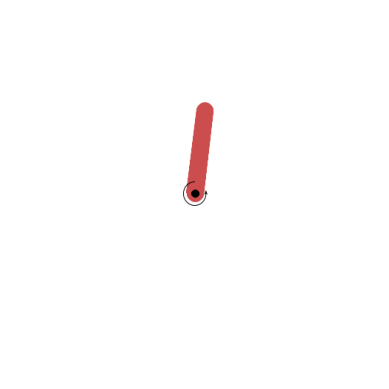

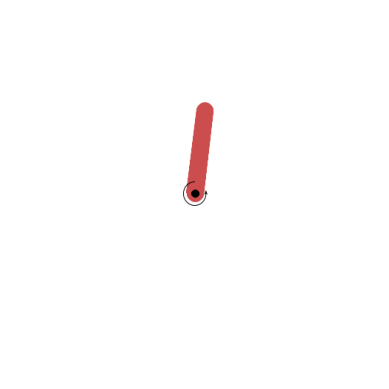

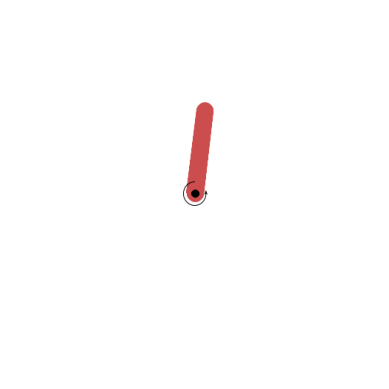

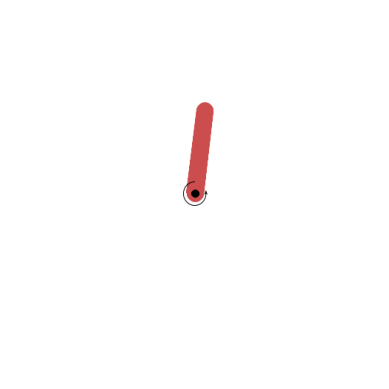

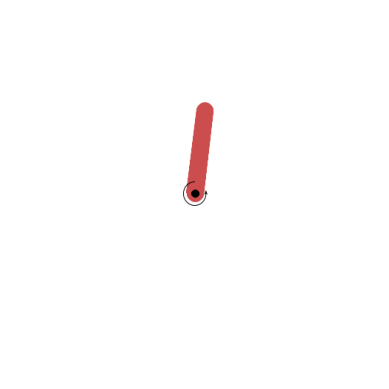

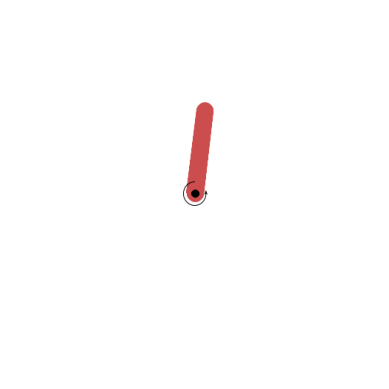

In [4]:
import matplotlib.pyplot as plt

# Modelin ortamda 50 adım hareket etmesini sağlar
for _ in range(50):
    # Modelden mevcut gözleme göre eylem tahmini alır
    action, _ = agent.predict(observation)
    # Ortamda eylemi uygular, yeni gözlem, ödül, tamamlanma durumu ve bilgi alır
    observation, reward, done, info = vector_env.step(action)
    # Ortamı render eder ve görüntüyü gösterir
    frame = environment.render()
    plt.imshow(frame)
    plt.axis('off')
    plt.show()